In [4]:
import matplotlib.pyplot as plt
import numpy as np
from helpers import get_error_rate
from IPython.display import display
from matplotlib.pyplot import figure
from qiskit import IBMQ, QuantumCircuit, transpile
from qiskit.providers.aer import AerSimulator


In [5]:
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-07-27 00:24:41,468: Credentials are already in use. The existing account in the session will be replaced.


In [6]:
hw = provider.get_backend("ibmq_lima")
sim = AerSimulator.from_backend(hw)
aer = AerSimulator()

In [7]:
n_qubits = hw.configuration().n_qubits

In [8]:
circs_not = []
circs_not_expected = []
for cnt in range(100):
	qc = QuantumCircuit(n_qubits, n_qubits)
	for i in range(cnt):
		qc.x(range(n_qubits))
		qc.barrier()
	qc.measure_all(add_bits=False)
	circs_not.append(qc)
	circs_not_expected.append({"0"*n_qubits if cnt % 2 == 0 else "1"*n_qubits : 1})
circs_not_transpiled = transpile(circs_not, hw, optimization_level=0)

In [9]:
#circs_not_job = hw.run(circs_not_transpiled)

In [10]:
circs_not_job = hw.retrieve_job("62bc6879d8e29d999520acbd")

In [11]:
circs_not_result = circs_not_job.result().get_counts()
circs_not_result_sim = sim.run(transpile(circs_not, sim, optimization_level=0)).result().get_counts()
circs_not_error = [get_error_rate(r, r_expected) for r, r_expected in zip(circs_not_result, circs_not_expected)]
circs_not_error = np.array(circs_not_error)
print(circs_not_error.shape)
circs_not_sim_error = [get_error_rate(r, r_expected) for r, r_expected in zip(circs_not_result_sim, circs_not_expected)]
circs_not_sim_error = np.array(circs_not_sim_error)
print(circs_not_sim_error.shape)

(100,)
(100,)


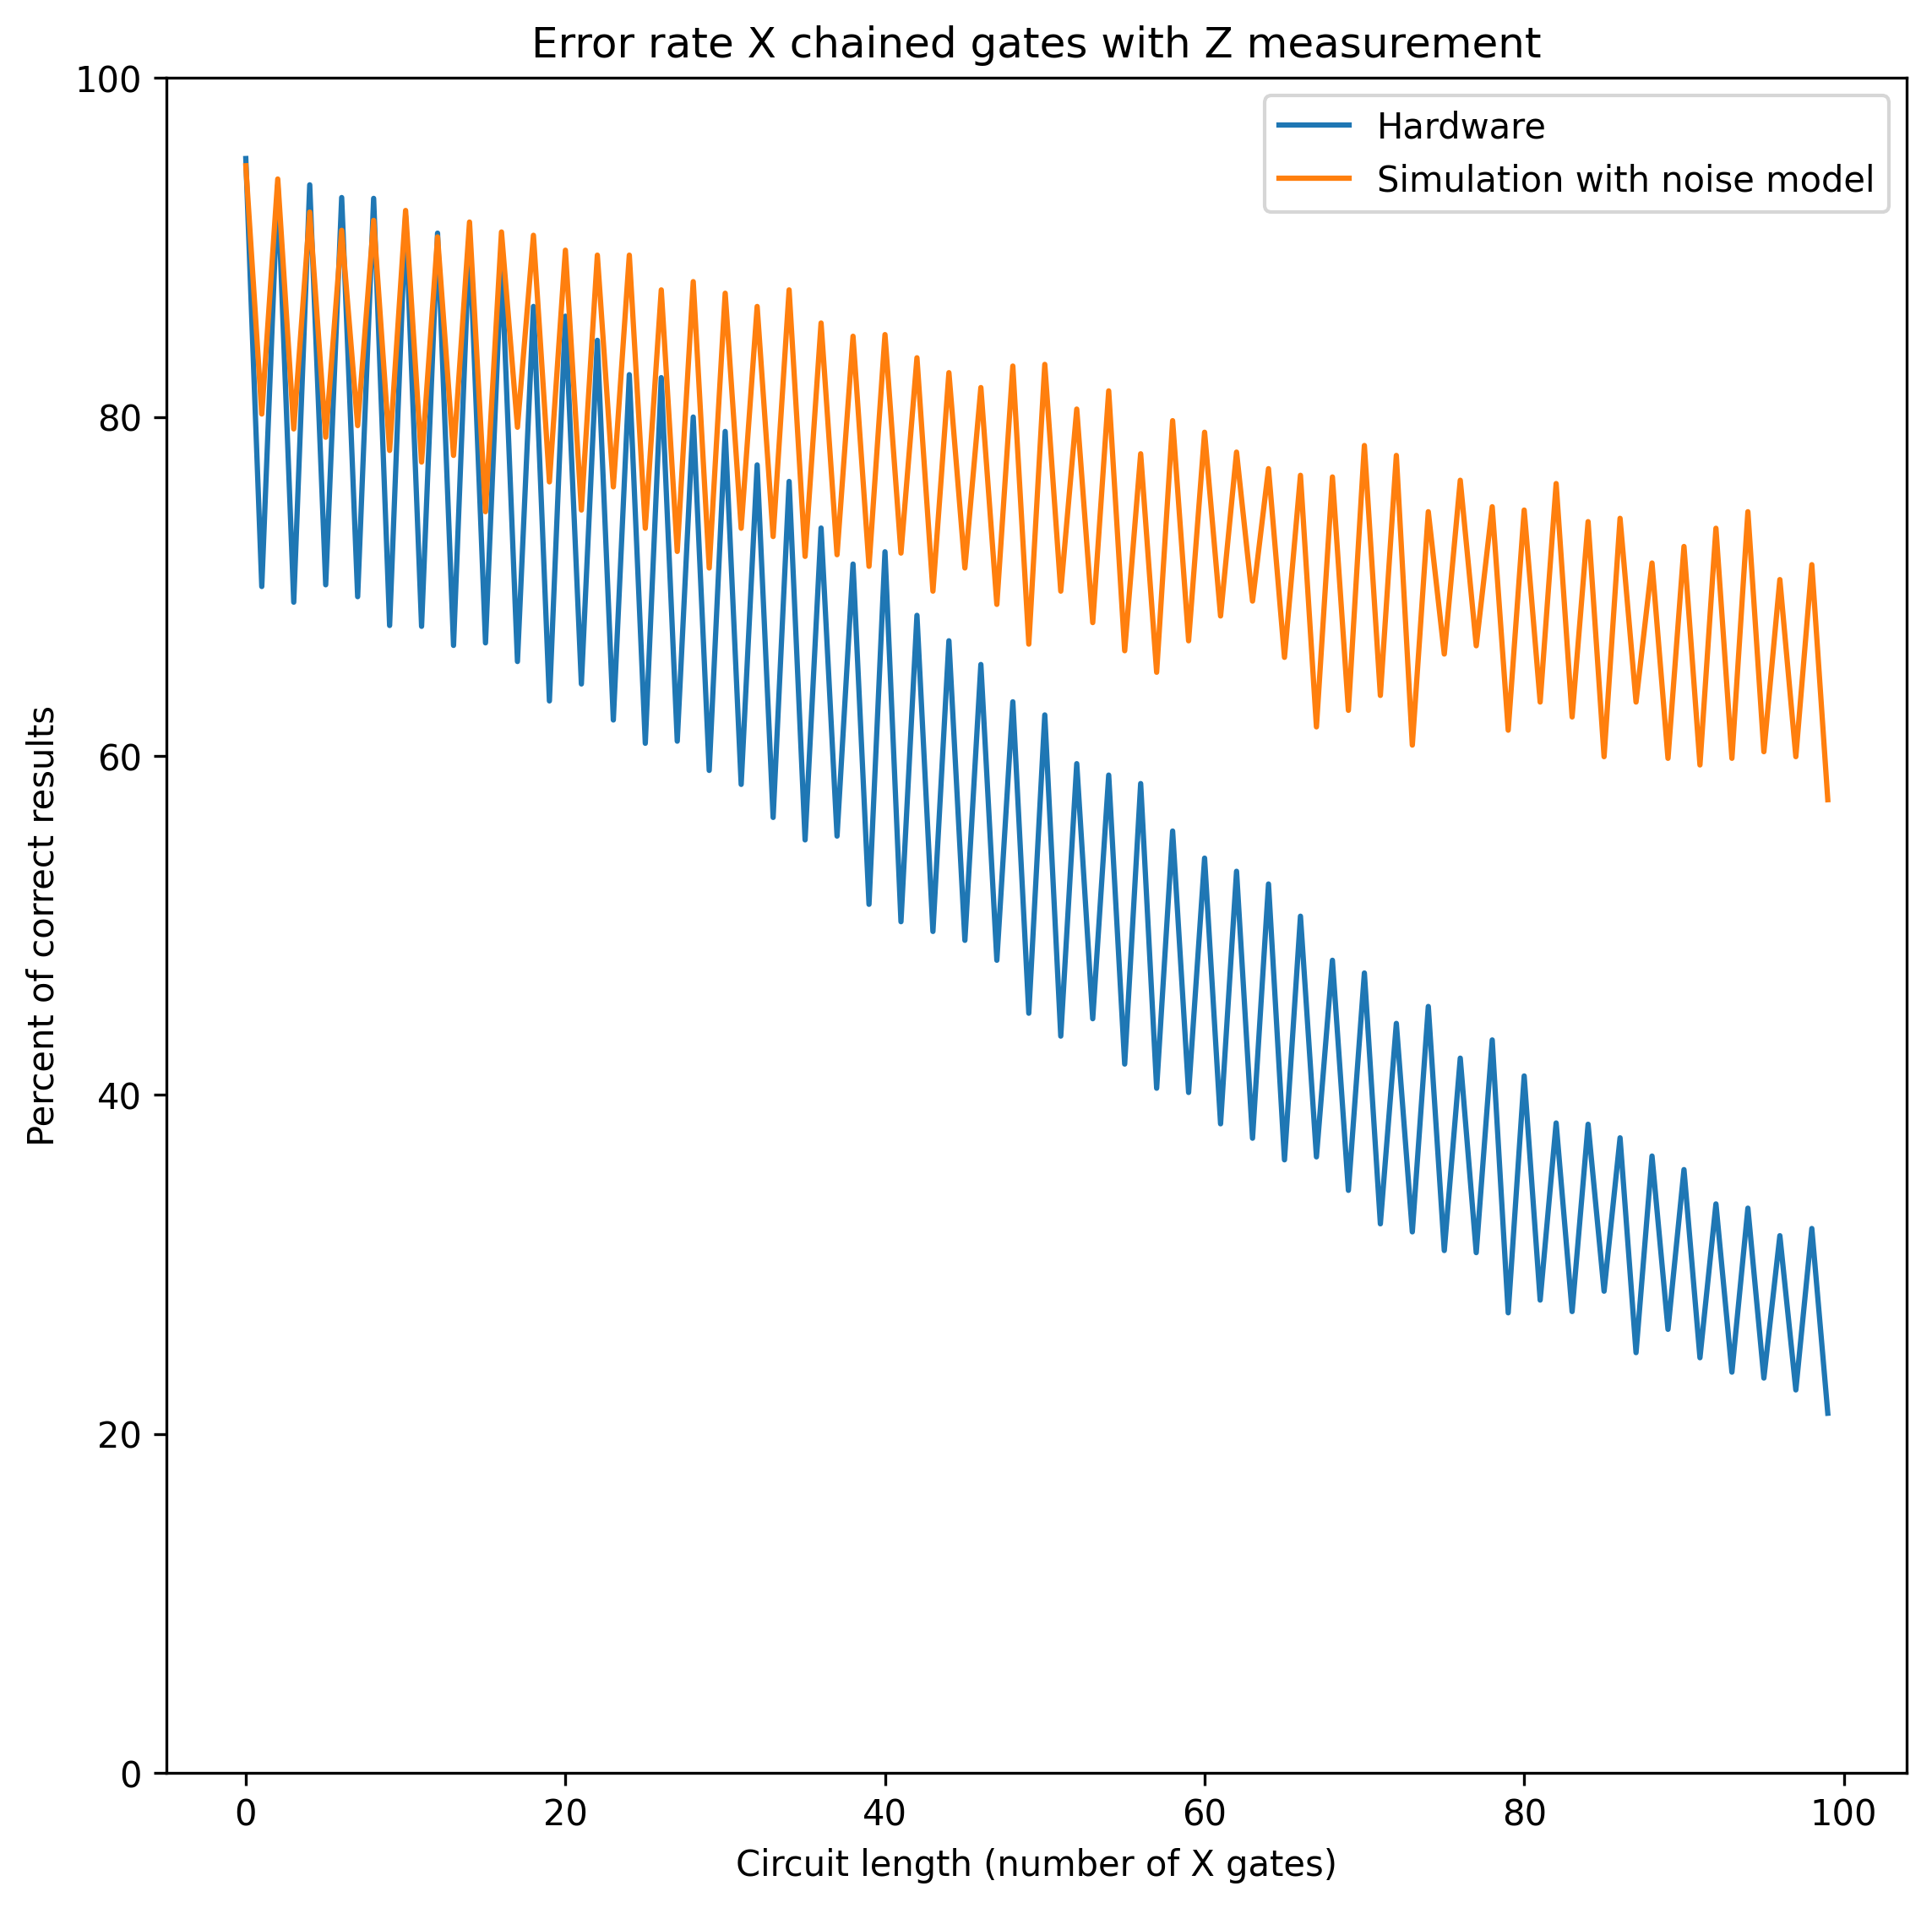

None

In [12]:
factor = 3
figure_width = 5.90666*factor/2
figure_heigth = figure_width
dpi = 300
figure(figsize=(figure_width, figure_heigth), dpi=dpi)

plt.title(f"Error rate X chained gates with Z measurement")
plt.xlabel(f"Circuit length (number of X gates)")
plt.ylabel(f"Percent of correct results")
plt.ylim(top=100)
plt.plot(circs_not_error*100, label="Hardware")
plt.plot(circs_not_sim_error*100, label="Simulation with noise model")
plt.legend()
plt.savefig(f"../images/z_measurement_nots.png", bbox_inches='tight')
display(plt.show())

In [13]:
circs_not_y_meas = []
for cnt in range(100):
	qc = QuantumCircuit(n_qubits, n_qubits)
	qc.h(range(n_qubits))
	qc.s(range(n_qubits))
	for i in range(cnt):
		qc.x(range(n_qubits))
		qc.barrier()
	qc.sdg(range(n_qubits))
	qc.h(range(n_qubits))
	qc.measure_all(add_bits=False)
	circs_not_y_meas.append(qc)
circs_not_y_meas_expected = aer.run(transpile(circs_not_y_meas, aer, optimization_level=0)).result().get_counts()
circs_not_y_meas_transpiled = transpile(circs_not_y_meas, hw, optimization_level=0)

In [14]:
circs_not_y_meas_expected[2]

{'00000': 1024}

In [15]:
#circs_not_y_meas_job = hw.run(circs_not_y_meas_transpiled)
#print(circs_not_y_meas_job.job_id())

In [16]:
circs_not_y_meas_job = hw.retrieve_job("62bc6892f408cc2b01ff4507")
circs_not_y_meas_result = circs_not_y_meas_job.result().get_counts()
circs_not_y_result_sim = sim.run(transpile(circs_not_y_meas, sim, optimization_level=0)).result().get_counts()
circs_not_y_meas_error = [get_error_rate(r, r_expected) for r, r_expected in zip(circs_not_y_meas_result, circs_not_y_meas_expected)]
circs_not_y_meas_error = np.array(circs_not_y_meas_error)
print(circs_not_y_meas_error.shape)
circs_not_y_sim_error = [get_error_rate(r, r_expected) for r, r_expected in zip(circs_not_y_result_sim, circs_not_y_meas_expected)]
circs_not_y_sim_error = np.array(circs_not_y_sim_error)
print(circs_not_y_sim_error.shape)

(100,)
(100,)


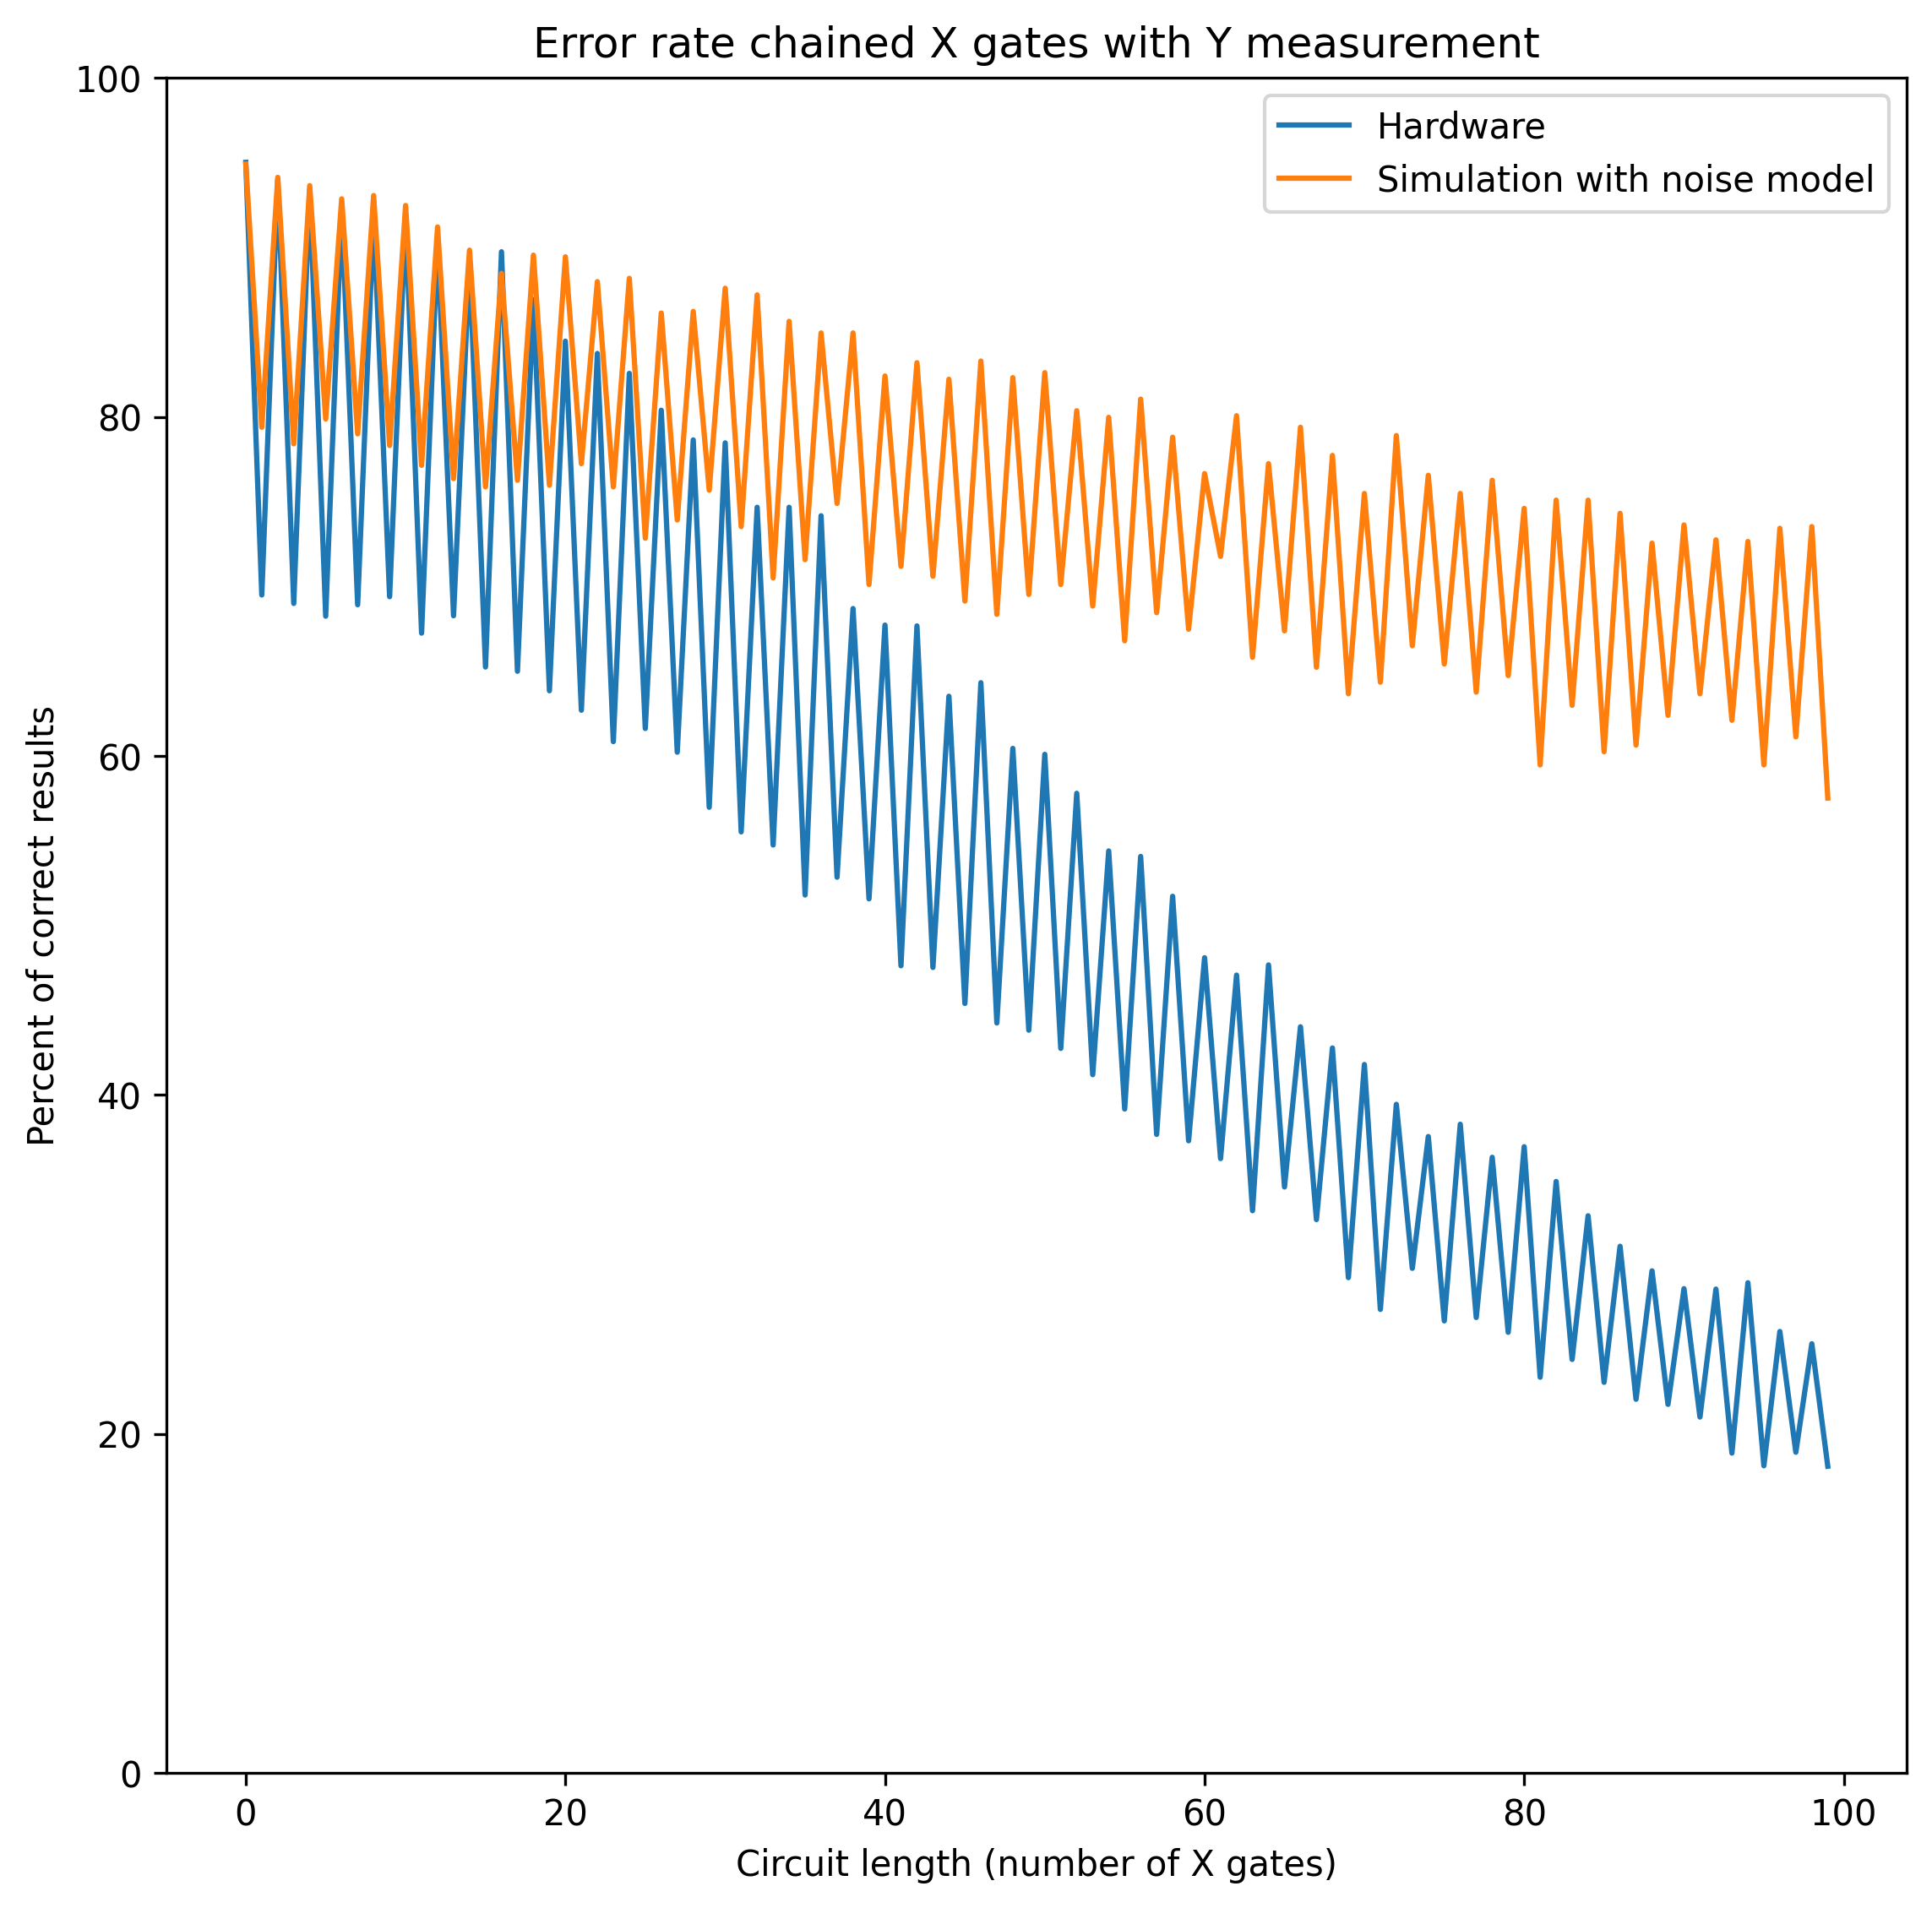

None

In [17]:
factor = 3
figure_width = 5.90666*factor/2
figure_heigth = figure_width
dpi = 300
figure(figsize=(figure_width, figure_heigth), dpi=dpi)
plt.title(f"Error rate chained X gates with Y measurement")
plt.xlabel(f"Circuit length (number of X gates)")
plt.ylabel(f"Percent of correct results")
plt.ylim(top=100)
plt.plot(circs_not_y_meas_error*100, label="Hardware")
plt.plot(circs_not_y_sim_error*100, label="Simulation with noise model")
plt.legend()
plt.savefig(f"../images/y_measurement.png", bbox_inches='tight')
display(plt.show())

In [18]:
circs_not_x_meas = []
for cnt in range(100):
	qc = QuantumCircuit(n_qubits, n_qubits)
	qc.h(range(n_qubits))
	for i in range(cnt):
		qc.x(range(n_qubits))
		qc.barrier()
	qc.h(range(n_qubits))
	qc.measure_all(add_bits=False)
	circs_not_x_meas.append(qc)
circs_not_x_meas_expected = aer.run(transpile(circs_not_x_meas, aer, optimization_level=0)).result().get_counts()
circs_not_x_meas_transpiled = transpile(circs_not_x_meas, hw, optimization_level=0)

In [19]:
#circs_not_x_meas_job = hw.run(circs_not_x_meas_transpiled)

In [20]:
circs_not_x_meas_job = hw.retrieve_job("62bc62d3d8e29d807c20aca6")
circs_not_x_meas_result = circs_not_x_meas_job.result().get_counts()
circs_not_x_sim_result = sim.run(transpile(circs_not_x_meas, sim, optimization_level=0)).result().get_counts()
circs_not_x_meas_error = [get_error_rate(r, r_expected) for r, r_expected in zip(circs_not_x_meas_result, circs_not_x_meas_expected)]
circs_not_x_meas_error = np.array(circs_not_x_meas_error)
print(circs_not_x_meas_error.shape)
circs_not_x_sim_error = [get_error_rate(r, r_expected) for r, r_expected in zip(circs_not_x_sim_result, circs_not_x_meas_expected)]
circs_not_x_sim_error = np.array(circs_not_x_sim_error)
print(circs_not_x_sim_error.shape)

(100,)
(100,)


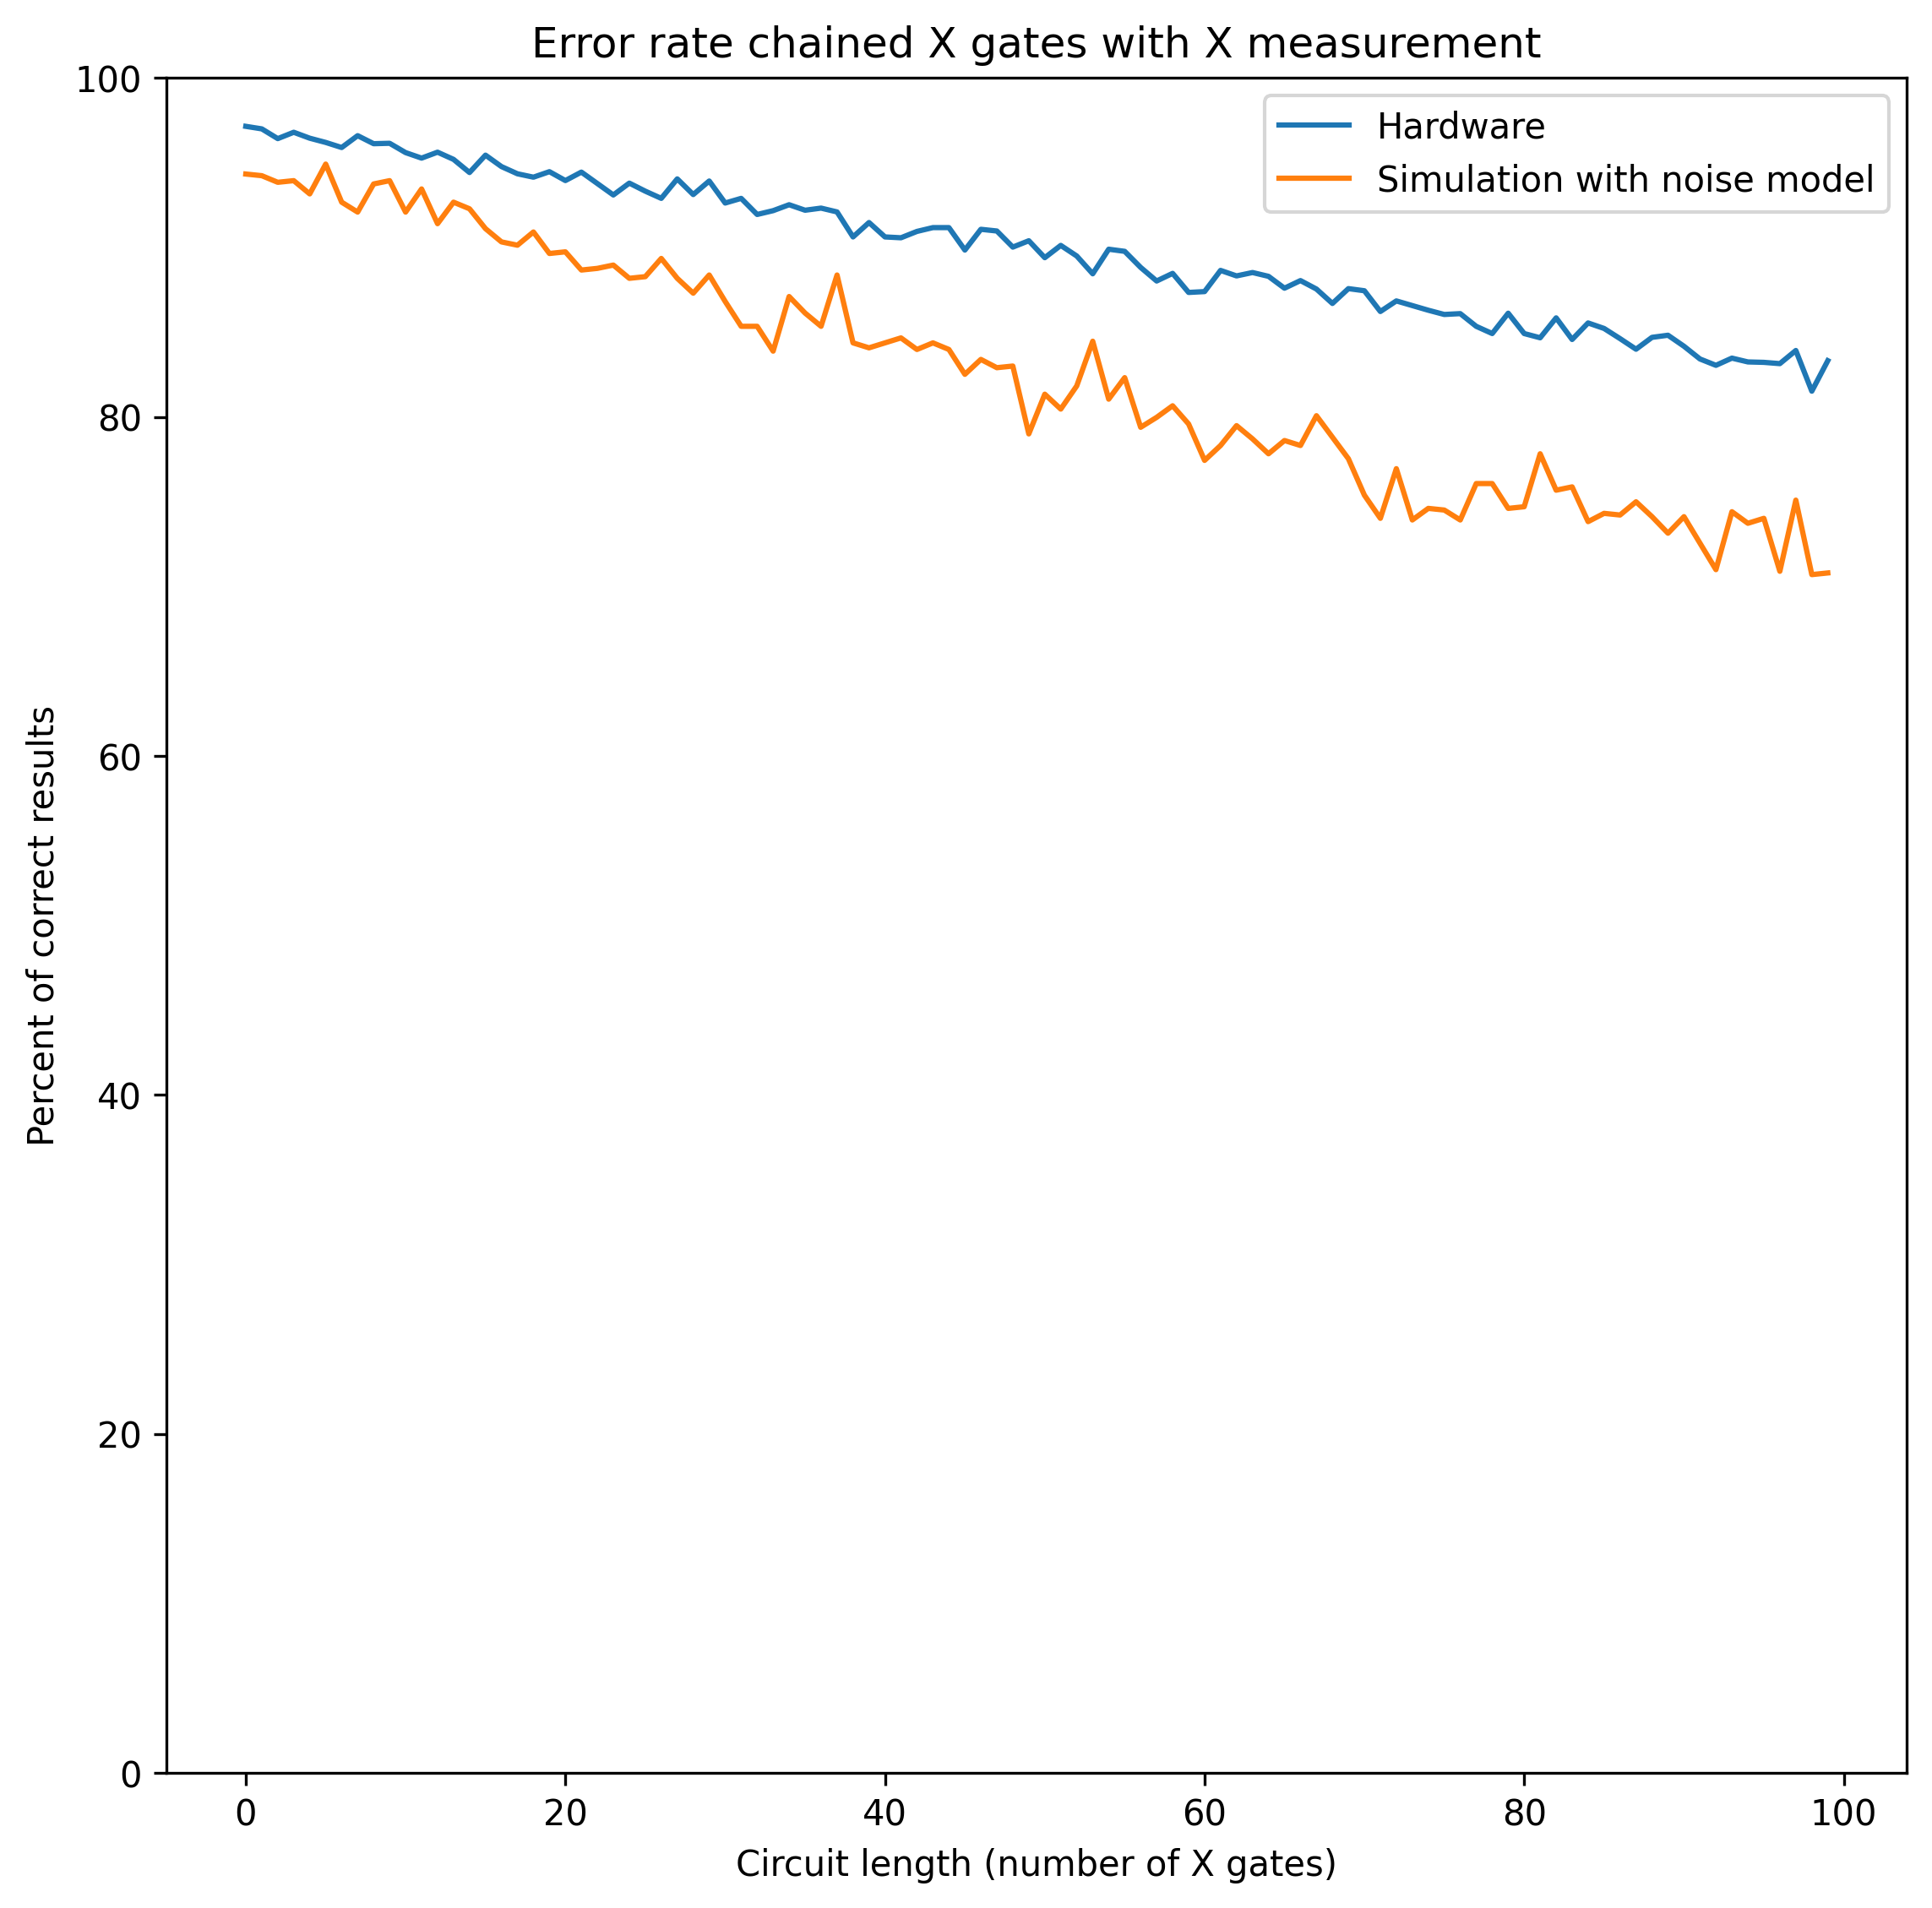

None

In [21]:
factor = 3
figure_width = 5.90666*factor/2
figure_heigth = figure_width
dpi = 300
figure(figsize=(figure_width, figure_heigth), dpi=dpi)
plt.title(f"Error rate chained X gates with X measurement")
plt.xlabel(f"Circuit length (number of X gates)")
plt.ylabel(f"Percent of correct results")
plt.ylim(top=100)
plt.plot(circs_not_x_meas_error*100, label="Hardware")
plt.plot(circs_not_x_sim_error*100, label="Simulation with noise model")
plt.legend()
plt.savefig(f"../images/x_measurements.png", bbox_inches='tight')
display(plt.show())

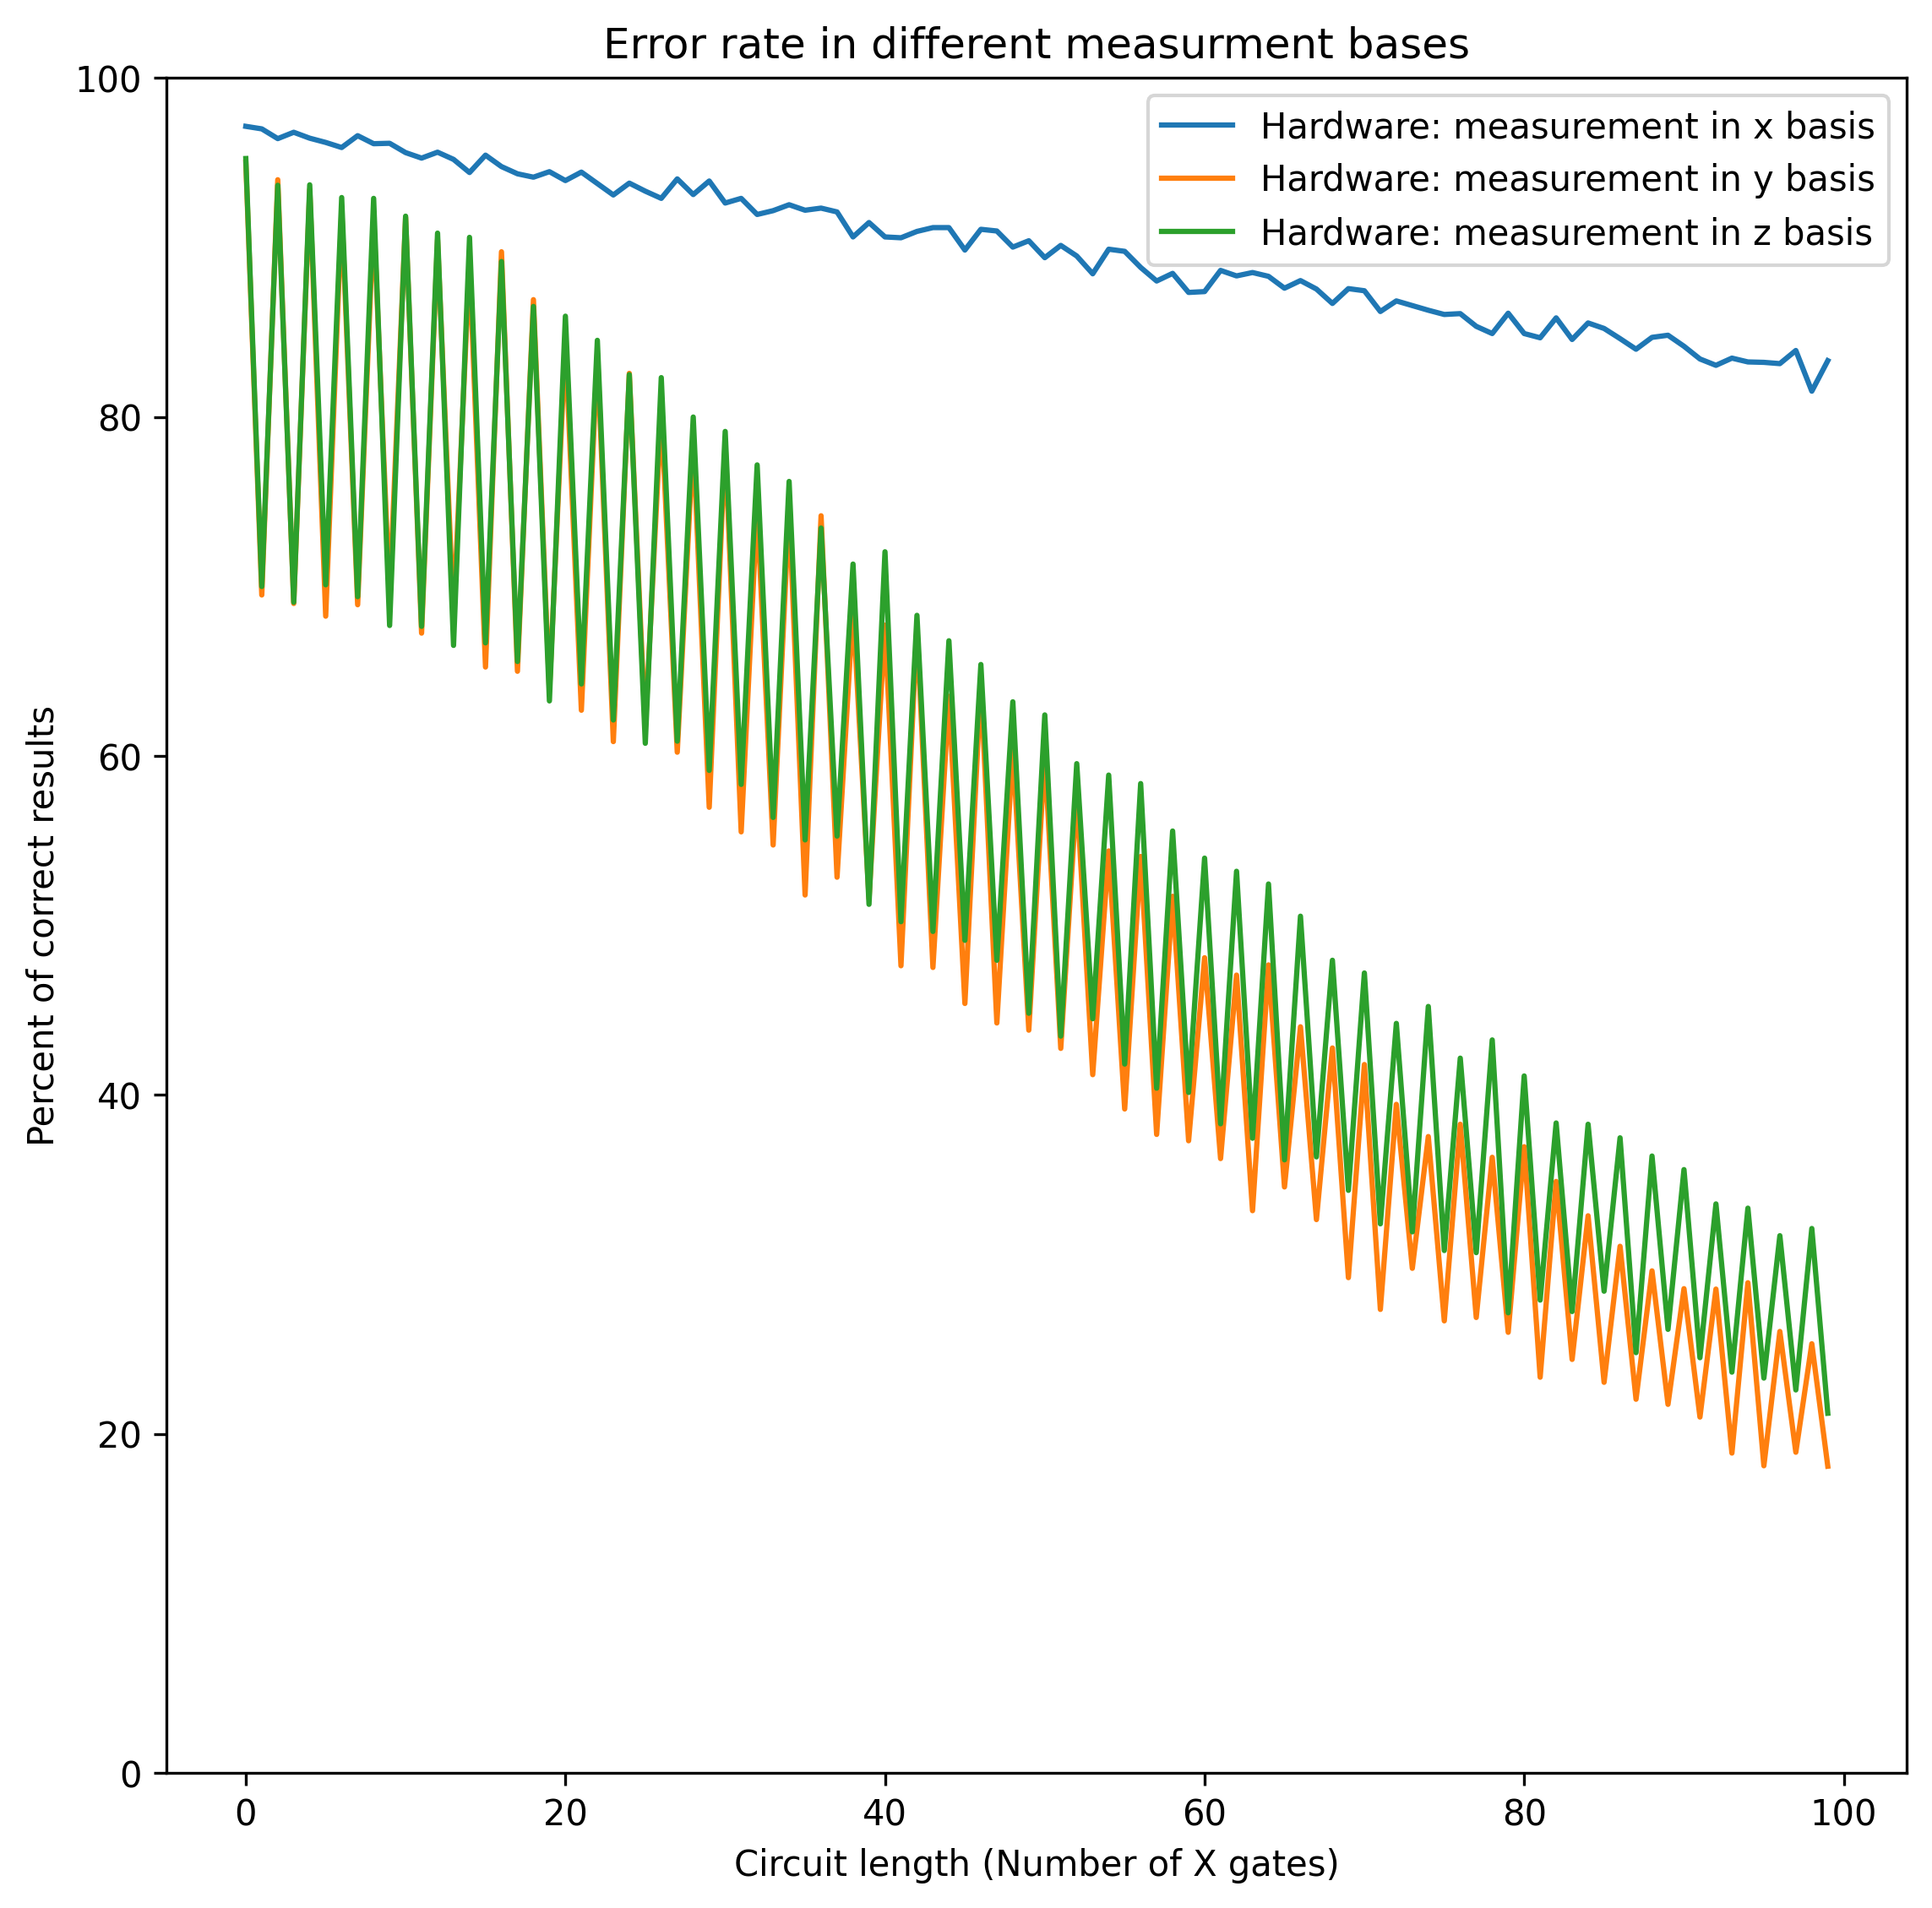

None

In [22]:
factor = 3
figure_width = 5.90666*factor/2
figure_heigth = figure_width
dpi = 300
figure(figsize=(figure_width, figure_heigth), dpi=dpi)
plt.title(f"Error rate in different measurment bases")
plt.xlabel(f"Circuit length (Number of X gates)")
plt.ylabel(f"Percent of correct results")
plt.ylim(top=100)
plt.plot(circs_not_x_meas_error*100, label="Hardware: measurement in x basis")
plt.plot(circs_not_y_meas_error*100, label="Hardware: measurement in y basis")
plt.plot(circs_not_error*100, label="Hardware: measurement in z basis")
plt.legend()
plt.savefig(f"../images/different_measurements.png", bbox_inches='tight')
display(plt.show())